In [1]:
# Importing Libraries
import numpy as np 
import pandas as pd 

In [2]:
#loadind dataset
df = pd.read_csv('train.csv')
df.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


<AxesSubplot:>

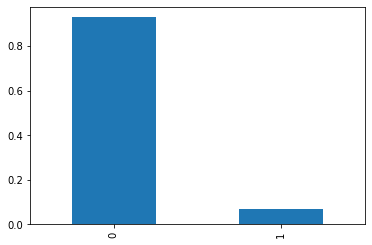

In [3]:
#plot of label distribution
df['label'].value_counts(normalize = True).plot.bar()

In [4]:
#creating a copy of 2242 non-racist tweets to balance it with the total number of available racist tweets.
dfnr = df[df["label"] == 0][:2242]
dfnr

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
2404,2405,0,found my future husband on the plane to marbs ...
2405,2406,0,", excited, clapping, unbreakable kimmy schmid..."
2406,2407,0,not long until the england v wales match! the ...
2407,2408,0,nude rear naughty naked school girls


In [5]:
#creating a copy racist tweets
dfr = df[df["label"] == 1]
dfr

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
...,...,...,...
31934,31935,1,lady banned from kentucky mall. @user #jcpenn...
31946,31947,1,@user omfg i'm offended! i'm a mailbox and i'...
31947,31948,1,@user @user you don't have the balls to hashta...
31948,31949,1,"makes you ask yourself, who am i? then am i a..."


In [6]:
#Adding the two dataframes together
frames = [dfnr, dfr]
df = pd.concat(frames)

In [7]:
df.reset_index(drop=True,inplace=True)

In [8]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
4479,31935,1,lady banned from kentucky mall. @user #jcpenn...
4480,31947,1,@user omfg i'm offended! i'm a mailbox and i'...
4481,31948,1,@user @user you don't have the balls to hashta...
4482,31949,1,"makes you ask yourself, who am i? then am i a..."


In [9]:
#Importing libraries for data cleaning
import re
import nltk
from nltk.corpus import stopwords

In [10]:
def clean_tweet_words(tweet):
    alpha_only = re.sub("[^a-zA-Z]",' ',tweet) #"[^a-zA-Z]" this regex will remove any non-alphabetical char as they are not significant
    words = alpha_only.lower().split()
    stop = set(stopwords.words('english'))
    #from the dataframe we can see 'user' word is quite common in the tweets, which is basically used for tagging someone in the tweet
    #so I will be removing that
    stop.add('user')
    sig_words = [word for word in words if not word in stop]
    return(" ".join(sig_words))

In [11]:
# creating a clean_tweet column and adding it to the dataframe
df['clean_tweet']  = df['tweet'].apply(lambda tweet: clean_tweet_words(tweet))

df

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair ...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation
...,...,...,...,...
4479,31935,1,lady banned from kentucky mall. @user #jcpenn...,lady banned kentucky mall jcpenny kentucky
4480,31947,1,@user omfg i'm offended! i'm a mailbox and i'...,omfg offended mailbox proud mailboxpride liber...
4481,31948,1,@user @user you don't have the balls to hashta...,balls hashtag say weasel away lumpy tony dipshit
4482,31949,1,"makes you ask yourself, who am i? then am i a...",makes ask anybody god oh thank god


In [12]:
#drop tweet and id columns
df.drop(['tweet',"id"],axis=1,inplace=True)

In [13]:
df

,label,clean_tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty
3,0,model love u take u time ur
4,0,factsguide society motivation
...,...,...
4479,1,lady banned kentucky mall jcpenny kentucky
4480,1,omfg offended mailbox proud mailboxpride liber...
4481,1,balls hashtag say weasel away lumpy tony dipshit
4482,1,makes ask anybody god oh thank god


In [14]:
df['clean_tweet']

0       father dysfunctional selfish drags kids dysfun...
1       thanks lyft credit use cause offer wheelchair ...
2                                          bihday majesty
3                             model love u take u time ur
4                           factsguide society motivation
                              ...                        
4479           lady banned kentucky mall jcpenny kentucky
4480    omfg offended mailbox proud mailboxpride liber...
4481     balls hashtag say weasel away lumpy tony dipshit
4482                   makes ask anybody god oh thank god
4483      sikh temple vandalised calgary wso condemns act
Name: clean_tweet, Length: 4484, dtype: object

In [15]:
# creating sentiment scores
from nltk.sentiment import SentimentIntensityAnalyzer as VS
sentiment_analyzer = VS()
def other_features(tweet):
    sentiment = sentiment_analyzer.polarity_scores(tweet)
    features = [sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound']]
    features = pd.DataFrame(features)
    return features

In [16]:
def get_feature_array(tweets):
    feats=[]
    for t in tweets:
        feats.append(other_features(t))
    return np.array(feats)

In [17]:
feats = get_feature_array(df['clean_tweet'])

In [18]:
len(feats)

4484

In [19]:
feats = feats.reshape(4484,4)


In [20]:
len(feats)

4484

In [21]:
feats = pd.DataFrame(feats,columns=["Negative","Positive","Neutral","Compound"])

In [22]:
feats

,Negative,Positive,Neutral,Compound
0,0.655,0.000,0.345,-0.7650
1,0.000,0.379,0.621,0.6705
2,0.000,0.000,1.000,0.0000
3,0.000,0.512,0.488,0.6369
4,0.000,0.545,0.455,0.3400
...,...,...,...,...
4479,0.375,0.000,0.625,-0.4588
4480,0.220,0.341,0.440,0.2732
4481,0.307,0.000,0.693,-0.4767
4482,0.000,0.626,0.374,0.6908


In [23]:
df = pd.concat([df,feats],axis=1)

In [24]:
df

,label,clean_tweet,Negative,Positive,Neutral,Compound
0,0,father dysfunctional selfish drags kids dysfun...,0.655,0.000,0.345,-0.7650
1,0,thanks lyft credit use cause offer wheelchair ...,0.000,0.379,0.621,0.6705
2,0,bihday majesty,0.000,0.000,1.000,0.0000
3,0,model love u take u time ur,0.000,0.512,0.488,0.6369
4,0,factsguide society motivation,0.000,0.545,0.455,0.3400
...,...,...,...,...,...,...
4479,1,lady banned kentucky mall jcpenny kentucky,0.375,0.000,0.625,-0.4588
4480,1,omfg offended mailbox proud mailboxpride liber...,0.220,0.341,0.440,0.2732
4481,1,balls hashtag say weasel away lumpy tony dipshit,0.307,0.000,0.693,-0.4767
4482,1,makes ask anybody god oh thank god,0.000,0.626,0.374,0.6908


In [25]:
df[df['label']==0]

,label,clean_tweet,Negative,Positive,Neutral,Compound
0,0,father dysfunctional selfish drags kids dysfun...,0.655,0.000,0.345,-0.7650
1,0,thanks lyft credit use cause offer wheelchair ...,0.000,0.379,0.621,0.6705
2,0,bihday majesty,0.000,0.000,1.000,0.0000
3,0,model love u take u time ur,0.000,0.512,0.488,0.6369
4,0,factsguide society motivation,0.000,0.545,0.455,0.3400
...,...,...,...,...,...,...
2237,0,found future husband plane marbs never gonna s...,0.000,0.000,1.000,0.0000
2238,0,excited clapping unbreakable kimmy schmidt kim...,0.000,0.211,0.789,0.3400
2239,0,long england v wales match team fish getting s...,0.000,0.159,0.841,0.1779
2240,0,nude rear naughty naked school girls,0.000,0.000,1.000,0.0000


In [26]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df,test_size = 0.2,random_state=0)

In [27]:
train_clean_tweet = []
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet = []
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

In [28]:
train_clean_tweet

['pa mil rejected putinschoice boycott business amp hatred must stoppe',
 'hammock attempted whitegenocide lies tinfoilhat fakenews altrightcards',
 'please retweet impoant issue needs discussed nojustice loserpizza',
 'father day friends',
 'black amp feel like stomping listen retweet tampa miami',
 'creative positive affirmation',
 'reject news latest amwriting aicle',
 'smiles media pressconference antalya turkey sunday throwback love',
 'crazy things women complementarianism complementarian',
 'cant run thug fool agitator stl',
 'trump newyork co chair gorilla comment michelleobama damn asians draintheswamp',
 'give hug love cats moment',
 'dad assume gender',
 'antisemitism kills remember one born hate love change world',
 'people like already forgot nah new names made hashtag weekly basis',
 'definitive history racist ideas required reading ushistory afamhist',
 'moron leading us path much potential damage destroy world',
 'hell yeah hellfest festival photographer conces',
 'play

In [29]:
#importing tfidfvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

In [31]:
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [WinError
[nltk_data]     10013] An attempt was made to access a socket in a way
[nltk_data]     forbidden by its access permissions>


False

In [32]:
svc_pipe = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1, 4))),('svc', LinearSVC(random_state=0,max_iter=5000))])
nb_pipe = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1, 4))),('nb', MultinomialNB())])
rf_pipe = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1, 4))),('rf', RandomForestClassifier())])
lgbm_pipe = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1, 4))),('lgbm', lgb.LGBMClassifier())])
etc_pipe = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1, 4))),('etc', ExtraTreesClassifier())])
xgb_pipe = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1, 4))),('xgb', xgb.XGBClassifier())])
adb_pipe = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1, 4))),('adb',AdaBoostClassifier())])







In [33]:
svc_pipe.fit(train_clean_tweet,train['label'])
nb_pipe.fit(train_clean_tweet,train['label'])
rf_pipe.fit(train_clean_tweet,train['label'])
lgbm_pipe.fit(train_clean_tweet,train['label'])
etc_pipe.fit(train_clean_tweet,train['label'])
xgb_pipe.fit(train_clean_tweet,train['label'])
adb_pipe.fit(train_clean_tweet,train['label'])

C:\Users\Nelson\anaconda3\envs\tensor\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:24:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 4))),
                ('adb', AdaBoostClassifier())])

In [34]:
pred_svc = svc_pipe.predict(test_clean_tweet)
pred_nb = nb_pipe.predict(test_clean_tweet)
pred_rf = rf_pipe.predict(test_clean_tweet)
pred_lgbm = lgbm_pipe.predict(test_clean_tweet)
pred_etc = etc_pipe.predict(test_clean_tweet)
pred_xgb = xgb_pipe.predict(test_clean_tweet)
pred_adb = adb_pipe.predict(test_clean_tweet)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
print('SVC')
print(accuracy_score(test['label'],pred_svc))
print('\n')
print(confusion_matrix(test['label'],pred_svc))
print('\n')

SVC
0.8795986622073578


[[411  55]
 [ 53 378]]




In [37]:
from sklearn.metrics import classification_report
report = classification_report(test['label'], pred_svc )
print(report)

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       466
           1       0.87      0.88      0.88       431

    accuracy                           0.88       897
   macro avg       0.88      0.88      0.88       897
weighted avg       0.88      0.88      0.88       897



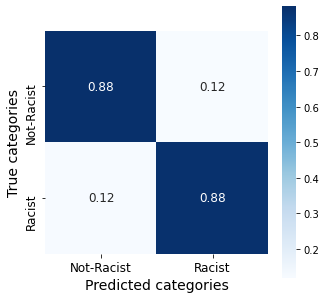

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix = confusion_matrix(test['label'],pred_svc)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Not-Racist','Racist']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap="Blues",cbar=True, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

Our classifier is doing good on +ve tweets but some work still needs to be done so as to improve its performance on -ve tweets.

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Naive Bayes Classifier')
print(accuracy_score(test['label'],pred_nb))
print('\n')
print(confusion_matrix(test['label'],pred_nb))
print('\n')


Naive Bayes Classifier
0.8740245261984393


[[398  68]
 [ 45 386]]




In [40]:
from sklearn.metrics import classification_report
report = classification_report(test['label'], pred_nb )
print(report)

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       466
           1       0.85      0.90      0.87       431

    accuracy                           0.87       897
   macro avg       0.87      0.87      0.87       897
weighted avg       0.88      0.87      0.87       897



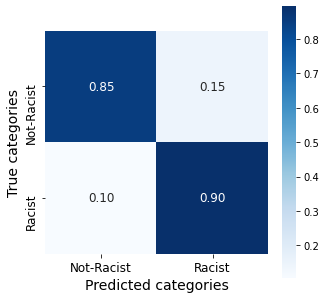

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix = confusion_matrix(test['label'],pred_nb)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Not-Racist','Racist']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap="Blues",cbar=True, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('rf')
print(accuracy_score(test['label'],pred_rf))
print('\n')
print(confusion_matrix(test['label'],pred_rf))
print('\n')

rf
0.8260869565217391


[[373  93]
 [ 63 368]]




In [43]:
from sklearn.metrics import classification_report
report = classification_report(test['label'], pred_rf )
print(report)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       466
           1       0.80      0.85      0.83       431

    accuracy                           0.83       897
   macro avg       0.83      0.83      0.83       897
weighted avg       0.83      0.83      0.83       897



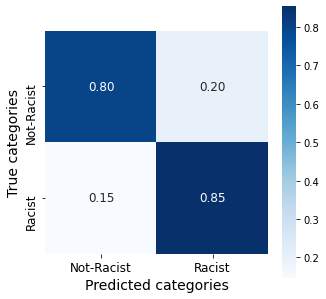

In [44]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix = confusion_matrix(test['label'],pred_rf)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Not-Racist','Racist']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap="Blues",cbar=True, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('lgbm')
print(accuracy_score(test['label'],pred_lgbm))
print('\n')
print(confusion_matrix(test['label'],pred_lgbm))
print('\n')

lgbm
0.7748049052396878


[[414  52]
 [150 281]]




In [46]:
from sklearn.metrics import classification_report
report = classification_report(test['label'], pred_lgbm )
print(report)

              precision    recall  f1-score   support

           0       0.73      0.89      0.80       466
           1       0.84      0.65      0.74       431

    accuracy                           0.77       897
   macro avg       0.79      0.77      0.77       897
weighted avg       0.79      0.77      0.77       897



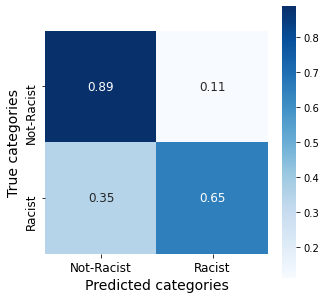

In [47]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix = confusion_matrix(test['label'],pred_lgbm)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Not-Racist','Racist']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap="Blues",cbar=True, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('etc')
print(accuracy_score(test['label'],pred_etc))
print('\n')
print(confusion_matrix(test['label'],pred_etc))
print('\n')

etc
0.8383500557413601


[[388  78]
 [ 67 364]]




In [49]:
from sklearn.metrics import classification_report
report = classification_report(test['label'], pred_etc)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       466
           1       0.82      0.84      0.83       431

    accuracy                           0.84       897
   macro avg       0.84      0.84      0.84       897
weighted avg       0.84      0.84      0.84       897



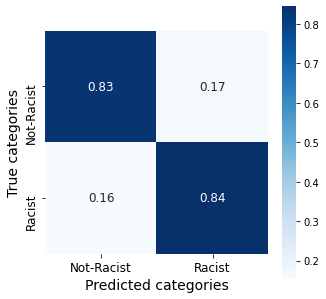

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix = confusion_matrix(test['label'],pred_etc)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Not-Racist','Racist']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap="Blues",cbar=True, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('xgb')
print(accuracy_score(test['label'],pred_xgb))
print('\n')
print(confusion_matrix(test['label'],pred_xgb))
print('\n')

xgb
0.8037904124860646


[[421  45]
 [131 300]]




In [52]:
from sklearn.metrics import classification_report
report = classification_report(test['label'], pred_xgb)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.90      0.83       466
           1       0.87      0.70      0.77       431

    accuracy                           0.80       897
   macro avg       0.82      0.80      0.80       897
weighted avg       0.81      0.80      0.80       897



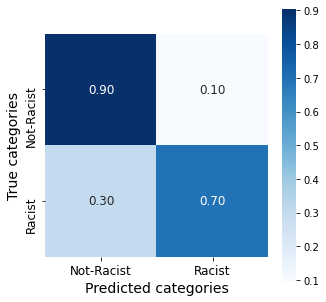

In [53]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix = confusion_matrix(test['label'],pred_xgb)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Not-Racist','Racist']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap="Blues",cbar=True, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('adb')
print(accuracy_score(test['label'],pred_adb))
print('\n')
print(confusion_matrix(test['label'],pred_adb))
print('\n')

adb
0.7525083612040134


[[435  31]
 [191 240]]




In [55]:
from sklearn.metrics import classification_report
report = classification_report(test['label'], pred_adb)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.93      0.80       466
           1       0.89      0.56      0.68       431

    accuracy                           0.75       897
   macro avg       0.79      0.75      0.74       897
weighted avg       0.79      0.75      0.74       897



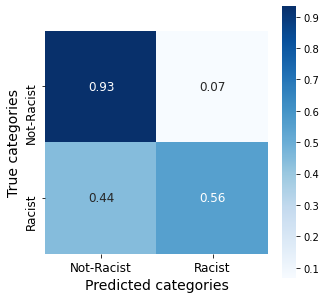

In [56]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix = confusion_matrix(test['label'],pred_adb)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Not-Racist','Racist']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap="Blues",cbar=True, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

In [57]:
from sklearn.neighbors import NearestCentroid
#ncclf1 = NearestCentroid(metric='manhattan',shrink_threshold=0.1)
nc_pipe = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1, 4))),("nc",NearestCentroid())])



In [58]:
nc_pipe.fit(train_clean_tweet,train['label'])
pred_nc = nc_pipe.predict(test_clean_tweet)

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('nc')
print(accuracy_score(test['label'],pred_nc))
print('\n')
print(confusion_matrix(test['label'],pred_nc))
print('\n')

nc
0.8093645484949833


[[432  34]
 [137 294]]




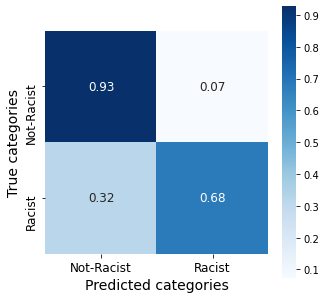

In [60]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix = confusion_matrix(test['label'],pred_nc)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Not-Racist','Racist']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap="Blues",cbar=True, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

In [61]:
from sklearn.linear_model import LogisticRegression

lr_pipe = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1, 4))),("lr",LogisticRegression())])
lr_pipe.fit(train_clean_tweet,train['label'])
pred_lr = lr_pipe.predict(test_clean_tweet)

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('lr')
print(accuracy_score(test['label'],pred_lr))
print('\n')
print(confusion_matrix(test['label'],pred_lr))
print('\n')

lr
0.875139353400223


[[408  58]
 [ 54 377]]




In [63]:
from sklearn.metrics import classification_report
report = classification_report(test['label'], pred_lr)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       466
           1       0.87      0.87      0.87       431

    accuracy                           0.88       897
   macro avg       0.87      0.88      0.87       897
weighted avg       0.88      0.88      0.88       897



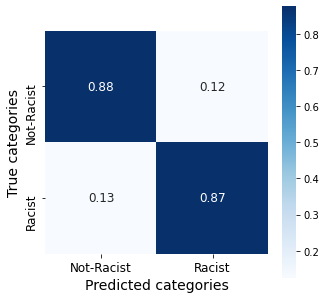

In [64]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix = confusion_matrix(test['label'],pred_lr)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Not-Racist','Racist']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap="Blues",cbar=True, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

In [65]:
from sklearn.linear_model import SGDClassifier
sgd_pipe = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1, 4))),('sgd', SGDClassifier())])
sgd_pipe.fit(train_clean_tweet,train['label'])
pred_sgd = sgd_pipe.predict(test_clean_tweet)

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('sgd')
print(accuracy_score(test['label'],pred_sgd))
print('\n')
print(confusion_matrix(test['label'],pred_sgd))
print('\n')

sgd
0.8762541806020067


[[408  58]
 [ 53 378]]




In [67]:
from sklearn.metrics import classification_report
report = classification_report(test['label'], pred_sgd)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       466
           1       0.87      0.88      0.87       431

    accuracy                           0.88       897
   macro avg       0.88      0.88      0.88       897
weighted avg       0.88      0.88      0.88       897



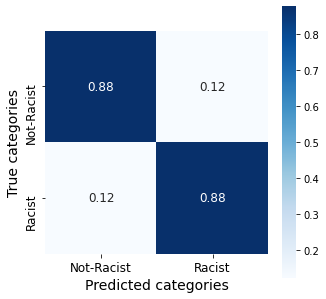

In [68]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix = confusion_matrix(test['label'],pred_sgd)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Not-Racist','Racist']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap="Blues",cbar=True, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

In [69]:
from sklearn.linear_model import LogisticRegressionCV
lrcv_pipe = Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1, 4))),('lrcv', LogisticRegressionCV(cv=5))])
lrcv_pipe.fit(train_clean_tweet,train['label'])
pred_lrcv = lrcv_pipe.predict(test_clean_tweet)

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('lrcv')
print(accuracy_score(test['label'],pred_lrcv))
print('\n')
print(confusion_matrix(test['label'],pred_lrcv))
print('\n')

lrcv
0.8762541806020067


[[407  59]
 [ 52 379]]




In [71]:
from sklearn.metrics import classification_report
report = classification_report(test['label'], pred_lrcv)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       466
           1       0.87      0.88      0.87       431

    accuracy                           0.88       897
   macro avg       0.88      0.88      0.88       897
weighted avg       0.88      0.88      0.88       897



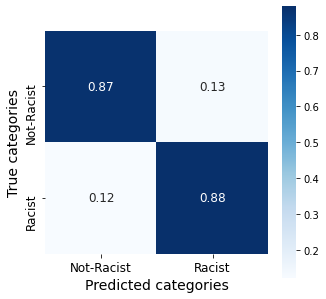

In [72]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_matrix = confusion_matrix(test['label'],pred_lrcv)
matrix_proportions = np.zeros((2,2))
for i in range(0,2):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Not-Racist','Racist']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap="Blues",cbar=True, square=True,fmt='.2f')
plt.ylabel(r'True categories',fontsize=14)
plt.xlabel(r'Predicted categories',fontsize=14)
plt.tick_params(labelsize=12)

In [73]:
test = pd.read_csv("test.csv")

In [74]:
test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [75]:
def clean_test_words(tweet):
    alpha_only = re.sub("[^a-zA-Z]",' ',tweet) #"[^a-zA-Z]" this regex will remove any non-alphabetical char as they are not significant
    words = alpha_only.lower().split()
    stop = set(stopwords.words('english'))
    #from the dataframe we can see 'user' word is quite common in the tweets, which is basically used for tagging someone in the tweet
    #so I will be removing that
    stop.add('user')
    sig_words = [word for word in words if not word in stop]
    return(" ".join(sig_words))

In [76]:
test['clean_tweet_test']  = test['tweet'].apply(lambda tweet: clean_test_words(tweet))

test.head(10)

,id,tweet,clean_tweet_test
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...
1,31964,@user #white #supremacists want everyone to s...,white supremacists want everyone see new birds...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways heal acne altwaystoheal healthy healing
3,31966,is the hp and the cursed child book up for res...,hp cursed child book reservations already yes ...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd bihday amazing hilarious nephew eli ahmir u...
5,31968,choose to be :) #momtips,choose momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...,something inside dies eyes ness smokeyeyes tir...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...,finished tattoo inked ink loveit thanks aleeee
8,31971,@user @user @user i will never understand why...,never understand dad left young deep inthefeels
9,31972,#delicious #food #lovelife #capetown mannaep...,delicious food lovelife capetown mannaepicure ...


In [77]:
test.drop(['tweet','id'],axis=1,inplace=True)

In [78]:
test

,clean_tweet_test
0,studiolife aislife requires passion dedication...
1,white supremacists want everyone see new birds...
2,safe ways heal acne altwaystoheal healthy healing
3,hp cursed child book reservations already yes ...
4,rd bihday amazing hilarious nephew eli ahmir u...
...,...
17192,thought factory left right polarisation trump ...
17193,feeling like mermaid hairflip neverready forma...
17194,hillary campaigned today ohio omg amp used wor...
17195,happy work conference right mindset leads cult...


In [79]:
test['clean_tweet_test']

0        studiolife aislife requires passion dedication...
1        white supremacists want everyone see new birds...
2        safe ways heal acne altwaystoheal healthy healing
3        hp cursed child book reservations already yes ...
4        rd bihday amazing hilarious nephew eli ahmir u...
                               ...                        
17192    thought factory left right polarisation trump ...
17193    feeling like mermaid hairflip neverready forma...
17194    hillary campaigned today ohio omg amp used wor...
17195    happy work conference right mindset leads cult...
17196    song glad free download shoegaze newmusic newsong
Name: clean_tweet_test, Length: 17197, dtype: object

In [80]:
pred_svc2 = svc_pipe.predict(test['clean_tweet_test'])

In [81]:
pred_svc2

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [82]:
pred_svc2 =pd.DataFrame(pred_svc2)

In [83]:
pred_svc2

,0
0,0
1,1
2,0
3,0
4,0
...,...
17192,1
17193,0
17194,1
17195,0


In [84]:
test

,clean_tweet_test
0,studiolife aislife requires passion dedication...
1,white supremacists want everyone see new birds...
2,safe ways heal acne altwaystoheal healthy healing
3,hp cursed child book reservations already yes ...
4,rd bihday amazing hilarious nephew eli ahmir u...
...,...
17192,thought factory left right polarisation trump ...
17193,feeling like mermaid hairflip neverready forma...
17194,hillary campaigned today ohio omg amp used wor...
17195,happy work conference right mindset leads cult...


In [85]:
test['test_predict'] = pred_svc2

In [86]:
test

,clean_tweet_test,test_predict
0,studiolife aislife requires passion dedication...,0
1,white supremacists want everyone see new birds...,1
2,safe ways heal acne altwaystoheal healthy healing,0
3,hp cursed child book reservations already yes ...,0
4,rd bihday amazing hilarious nephew eli ahmir u...,0
...,...,...
17192,thought factory left right polarisation trump ...,1
17193,feeling like mermaid hairflip neverready forma...,0
17194,hillary campaigned today ohio omg amp used wor...,1
17195,happy work conference right mindset leads cult...,0


In [87]:
test[test['test_predict']==1]

,clean_tweet_test,test_predict
1,white supremacists want everyone see new birds...,1
5,choose momtips,1
14,stand behind guncontrolplease senselessshootin...,1
17,amp love amp hugs amp kisses keep baby parenti...,1
19,thought factory bbc neutrality right wing fasc...,1
...,...,...
17176,racist pay ever,1
17182,ur joke ur defensive towards everything,1
17188,black professor demonizes proposes nazi style ...,1
17192,thought factory left right polarisation trump ...,1
